In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

plt.style.use("mystyle.mplstyle")

In [5]:
def lorentzian_curve(x, scale_factor, omega_0, gamma):
    return scale_factor / math.sqrt((omega_0 ** 2 - x ** 2) ** 2)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

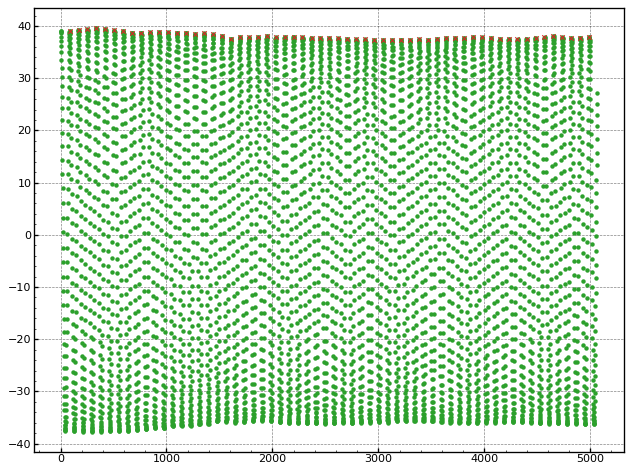

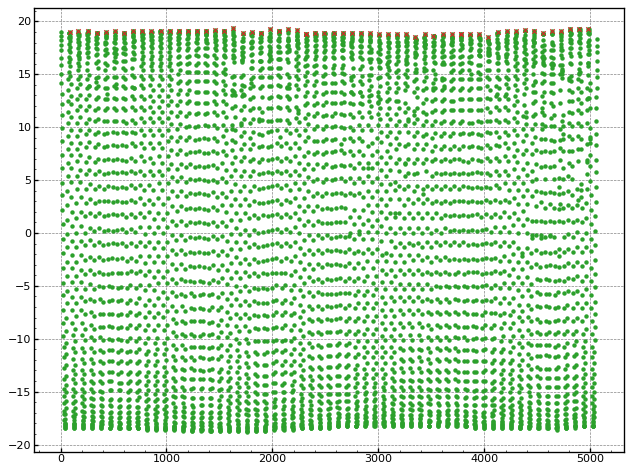

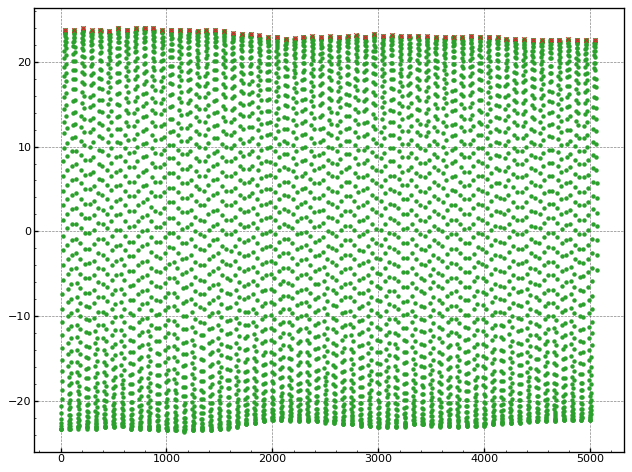

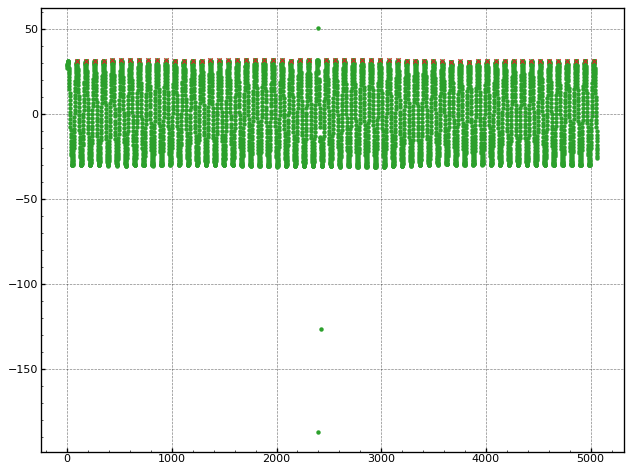

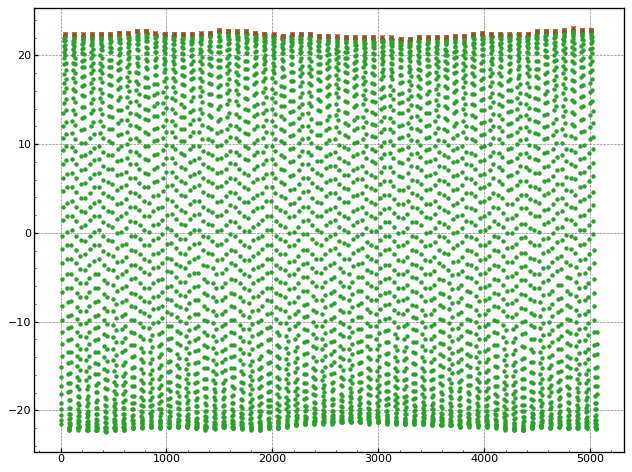

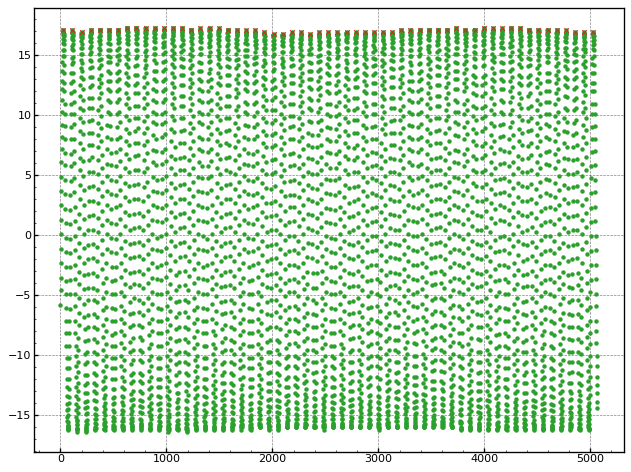

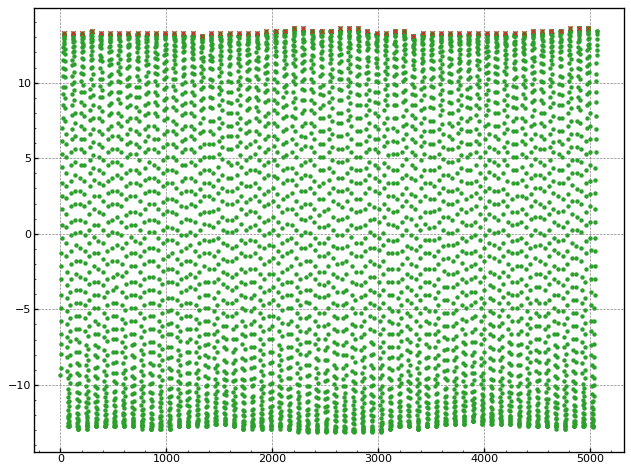

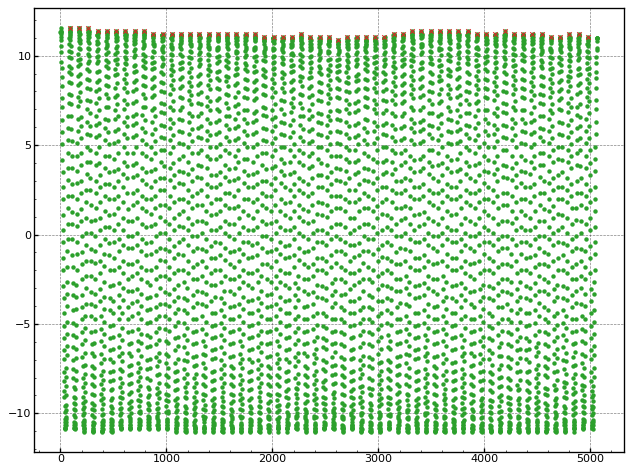

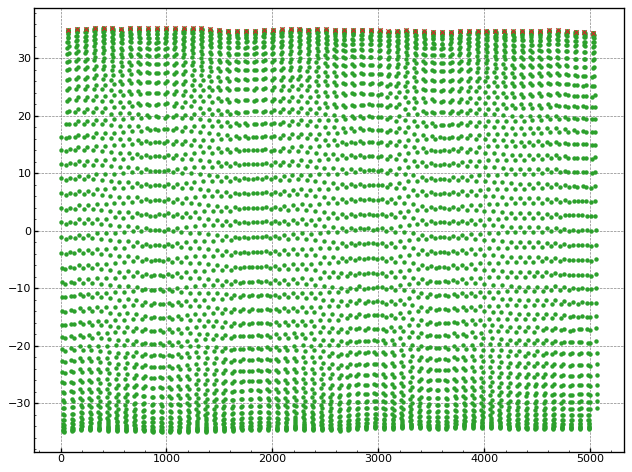

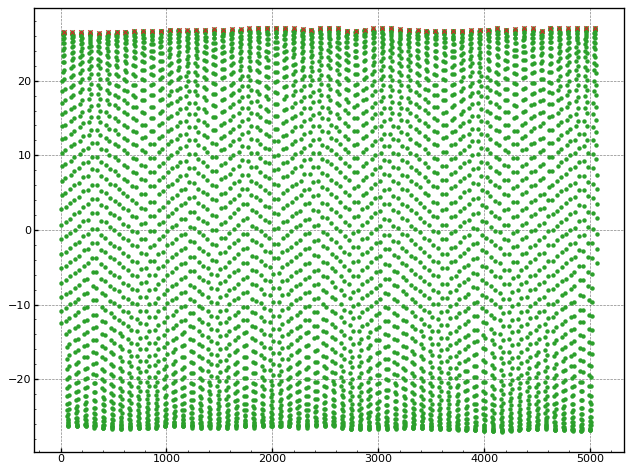

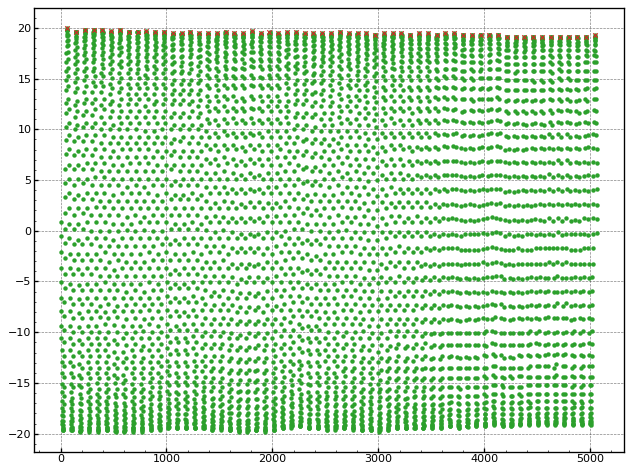

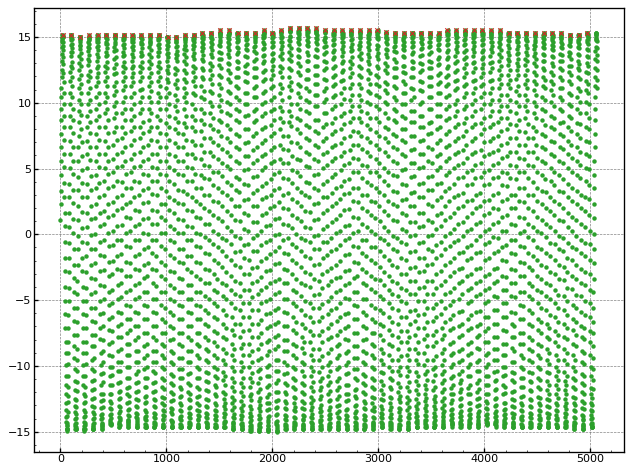

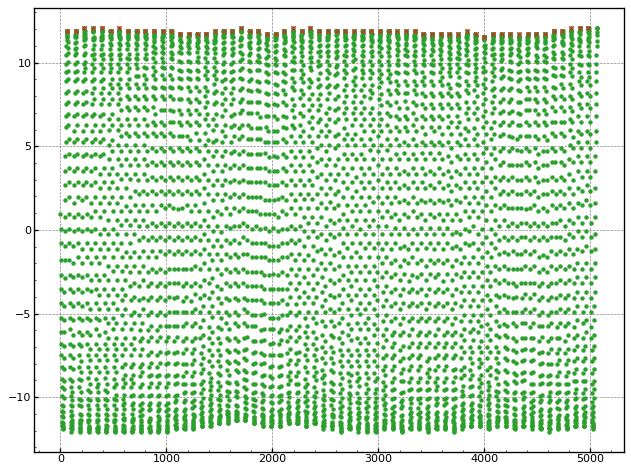

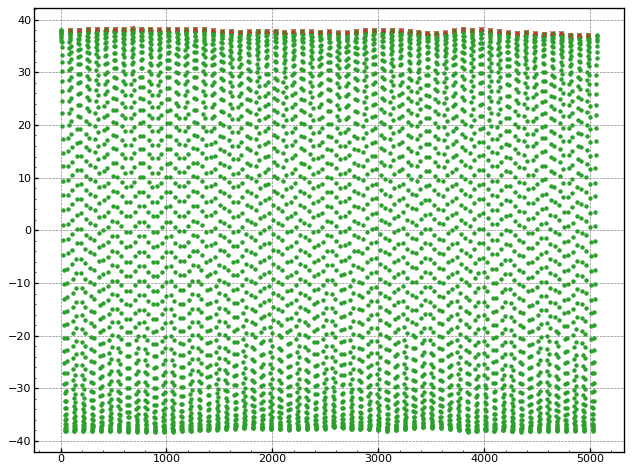

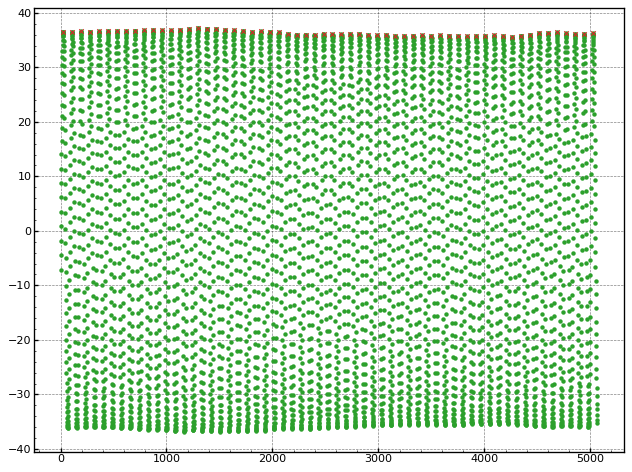

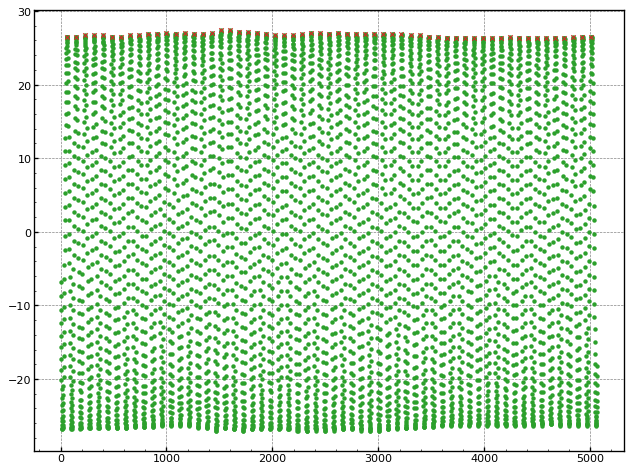

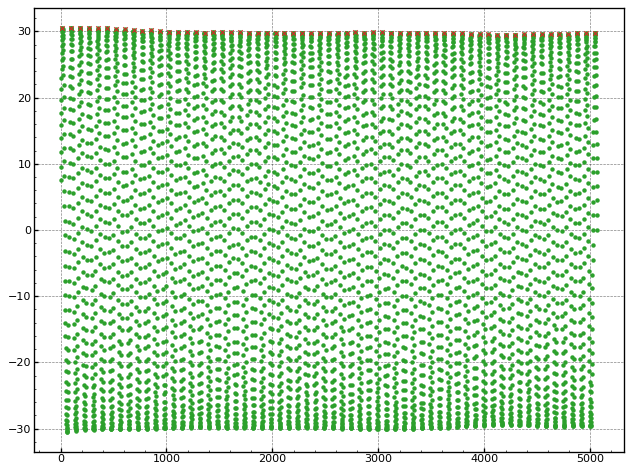

In [6]:
df = pd.read_csv("data/Rmolle/Data/oscillazioni lorentziana complete.csv", sep=';', decimal=',')
df.dropna(inplace=True)

freqs = [1.183, 1.164, 1.201, 1.175, 1.168, 1.160, 1.153, 1.146, 1.190, 1.197, 1.205, 1.212, 1.220, 1.186, 1.180, 1.172, 1.194]
lorentzian = []
lorentzian_errs = []

for i in range(len(df.columns)):
    # print(f"run #{i+1} len: {len(df.iloc[:,i])}")
    
    Y = df.iloc[5000:,i].tolist()
    X = np.linspace(0, len(Y), len(Y))

    peaks_indices, _ = find_peaks([y if y >= 0 else 0 for y in Y], width=20)
    peaks = [Y[j] for j in peaks_indices.tolist()]

    lorentzian.append(np.mean(peaks))
    lorentzian_errs.append(np.std(peaks) / math.sqrt(len(peaks)))
    
    fig,ax = plt.subplots()
    ax.scatter(X, Y, c='tab:green')
    ax.scatter(peaks_indices, peaks, marker='x', c='tab:red')

lorentzian = np.ndarray(lorentzian)
lorentzian_errs /= np.sum(lorentzian)
lorentzian /= np.sum(lorentzian)

X = np.linspace(lorentzian[0], lorentzian[-1], len(lorentzian))
fit_args, _ = curve_fit(lorentzian_curve, X, lorentzian)

fig,ax = plt.subplots()
ax.errorbar(freqs, lorentzian, lorentzian_errs, marker='o', markersize=3.0, c='tab:red', linestyle='')
ax.plot(X, [lorentzian(x, *fit_args) for x in X], ls='--', c='tab:green')